### Importation des bibliothèques

In [19]:
pip install scikeras


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV



### Chargement des données

Dataset: **Life expectancy**

Le dataset contient des données sur l'espérance de vie et des facteurs associés pour 193 pays entre 2000 et 2015, combinant des informations provenant de l'OMS (Observatoire mondial de la santé) et des données économiques issues de l'ONU.

On va essayer de prédire la variable "Life expectancy" en fonction des autres
facteurs (économiques, sociaux, vaccination, consommation..)


In [4]:
# Charger le CSV
data = pd.read_csv("LifeExpectancy.csv")

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#Taille du dataset
data.shape

(2938, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           


Caractéristiques principales :

* Taille : 2938 lignes et 22 colonnes.

Variables principales:

* Country : Nom du pays.
* Year : Année.
* Status : État du pays (développé ou en développement).
* Life expectancy : Espérance de vie.
* Adult Mortality : Mortalité adulte (par 1000).
* infant deaths : Décès infantiles.
* Alcohol : Consommation d'alcool (litres par personne par an).
* GDP : Produit intérieur brut par habitant.

### Prétraitement des données

In [7]:
# 1. Suppression des colonnes inutiles
data = data.drop(columns=['Country', 'Year', 'Status'])


In [8]:
# Remplir les valeurs nulles par la moyenne pour les colonnes numériques
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)


<ipython-input-8-e8802dd1ed2d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [9]:
#Vérification de l'absence de valeurs nulles
data.isna().sum()

,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0
Polio,0


In [10]:

# 2. Séparer la cible (Life expectancy) et les features
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

In [11]:
X.shape

(2938, 18)

In [12]:
y.shape

(2938,)

In [13]:
y=y.values.reshape(-1,1)

In [16]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


La normalisation des données garantit que toutes les variables ont une échelle similaire, évitant que celles ayant une grande plage de valeurs ne dominent les calculs.

Le StandardScaler transforme les données pour qu'elles aient :

Une moyenne de 0.

Un écart-type de 1.

In [15]:
#Affichage des variables apres la normalisation
X_scaled

array([[ 0.79158632,  0.26882378, -1.1729584 , ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 0.85607167,  0.28578638, -1.1729584 , ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 0.83188966,  0.30274898, -1.1729584 , ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-0.73994077, -0.04498439, -0.04414645, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [ 4.20124926, -0.04498439, -0.73624609, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [ 4.03197521, -0.05346569, -0.74646158, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [17]:
y_scaled

array([[-0.44444792],
       [-0.98094995],
       [-0.98094995],
       ...,
       [-2.56941673],
       [-2.5168185 ],
       [-2.44318096]])

In [18]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### Implémentation d’un réseau de neurones avec Tensforflow

Dans cette fonction, nous avons utilisé TensorFlow et son API Keras pour construire un modèle de réseau de neurones (NN) destiné à résoudre un problème de régression.
Elle inclut des paramètres réglables pour faciliter l'optimisation des hyperparamètres.

In [23]:
def create_model(optimizer='adam', neurons=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


* optimizer: adam est l'algorithme d'optimisation utilisé pour mettre à jour les poids
* dropout_rate: proportion des neurones désactivés aléatoirement pendant l'entrainement pour la régularisation (prévenir l'overfitting)(default: 0.2)
* activation='relu' : Utilise la fonction d'activation ReLU, qui introduit la non-linéarité et aide à apprendre des relations complexes.




In [24]:
# Wrapper Keras pour la régression
model = KerasRegressor(
    model=create_model,
    verbose=0
)
#Transformer le modèle Keras en un classifieur compatible avec les outils de scikit-learn, comme GridSearchCV ou RandomizedSearchCV, pour effectuer une recherche d'hyperparamètres.

Le wrapper permet de passer les paramètres (=neurons, dropout_rate, optimizer, etc.) directement via les outils de recherche de scikit-learn, rendant le processus d'optimisation fluide.

##  La recherche d-hyper parametres avec Random Search

### Random Search pour optimiser les hypermarametres

La Random Search est une méthode d'optimisation des hyperparamètres qui explore aléatoirement différentes combinaisons au lieu de tester toutes les combinaisons possibles comme dans la Grid Search. Cela permet de réduire le coût computationnel tout en ayant de bonnes chances de trouver des hyperparamètres optimaux.


=> Les combinaisons des hyperparamètres dans param_grid choisies aléatoirement sont testées.
Chaque combinaison est évaluée à l'aide de la validation croisée.
La combinaison qui maximise la précision moyenne sur les ensembles de validation est retenue.

In [25]:
## Définir les hyperparamètres à explorer
#Dictionnaire contenant les hyperparametres du modele à tester lors de la recherche

param_distributions = {
    'model__optimizer': ['adam', 'rmsprop'],  # Optimizers
    'model__neurons': [32, 64, 128],          # Nombre de neurones dans les couches cachées
    'model__dropout_rate': [0.2, 0.3, 0.5],  # Taux de dropout
    'batch_size': [16, 32],              # Taille des batchs
    'epochs': [50, 100]                 # Nombre d'époques
}

#Effectuer la recherche avec RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,  # Tester 10 combinaisons
    cv=3,       # Validation croisée avec 3 folds
    scoring='neg_mean_squared_error',  # MSE négatif comme score
    n_jobs=-1,
    random_state=42
)
#Le modele a évaluer ici est le wrapper KerasClassifier avec le dictionnaire d'hyperparametres
#CV=3: Validation croisée à 3 plis

# Lancer la recherche
random_search_result = random_search.fit(X_train, y_train)
# Afficher les meilleurs paramètres et la meilleure performance
print(f"Meilleurs paramètres : {random_search_result.best_params_}")
print(f"Meilleure performance (MSE négatif) : {random_search_result.best_score_}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Meilleurs paramètres : {'model__optimizer': 'adam', 'model__neurons': 128, 'model__dropout_rate': 0.3, 'epochs': 100, 'batch_size': 16}
Meilleure performance (MSE négatif) : -0.07237098687136774


In [26]:
# Obtenir la MSE réelle
best_mse = -random_search_result.best_score_  # On inverse la négation pour avoir la MSE positive
print(f"Meilleure MSE (positif) : {best_mse:.4f}")

Meilleure MSE (positif) : 0.0724


In [27]:
# Récupérer les meilleurs paramètres
best_params = random_search_result.best_params_

# Créer et entraîner le meilleur modèle
#Appel de la fonction create_model pour créer un réseau de neurones avec les meilleures parametres passés comme argument

final_model = create_model(
    optimizer=best_params['model__optimizer'],
    neurons=best_params['model__neurons'],
    dropout_rate=best_params['model__dropout_rate']
)

# Entraîner le modèle avec les meilleurs hyperparamètres
history = final_model.fit(
    X_train,
    y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_data=(X_test, y_test),
    verbose=1
)
#l'objet history contient les informations sur l'entrainement :
#loss : Valeur de la fonction de perte pour l'entraînement à chaque époque.
#accuracy : Précision sur les données d'entraînement.
#val_loss : Valeur de la fonction de perte sur les données de validation.
#val_accuracy : Précision sur les données de validation.

# Évaluer sur l'ensemble de test
y_pred = final_model.predict(X_test).flatten()
final_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE : {final_mse:.4f}")


Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4704 - mean_squared_error: 0.4704 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2273 - mean_squared_error: 0.2273 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2109 - mean_squared_error: 0.2109 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1497 - mean_squared_error: 0.1497 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1359 - mean_squared_error: 0.1359 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1294 - mean_squared_error: 0.1294 - val_los

### Visualisation des courbes d’apprentissage

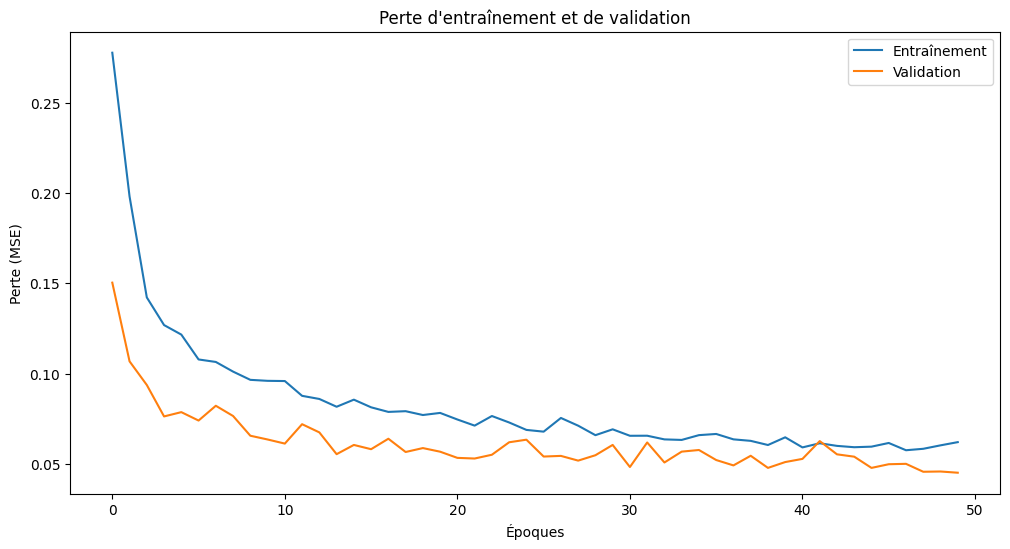

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.title("Perte d'entraînement et de validation")
plt.legend()
plt.show()


* Perte d'entraînement (ligne bleue) :
Diminue régulièrement au fil des époques.
Cette tendance montre que le modèle apprend efficacement sur les données d'entraînement.
* Perte de validation (ligne orange) :
Diminue également et reste légèrement en dessous de la perte d'entraînement, ce qui indique que le modèle généralise bien sans signes clairs de sur-apprentissage (overfitting).